In [1]:
# Standard Imports
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Sklearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Tensorflow imports
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data for the red wine
red_wine_df = pd.read_csv('winequality-red.csv', sep=';')
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# check the data info 
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# check the data distribution
red_wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
# check for the missing data
red_wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Check if the data is balance or imbalance
y_values = red_wine_df['quality'].value_counts()
y_values

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

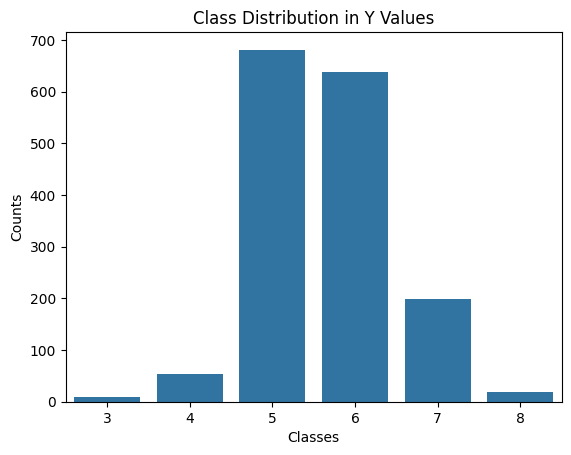

In [7]:
# data is imbalance
sns.countplot(x=red_wine_df['quality'])
plt.title('Class Distribution in Y Values')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.show()

In [8]:
# Given data is very imbalance, I will divide the quanlity into 2 buckets as shown below. 
binary_labels = [1 if y > 6 else 0 for y in red_wine_df['quality']]
red_wine_df['quality'] = binary_labels


In [9]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


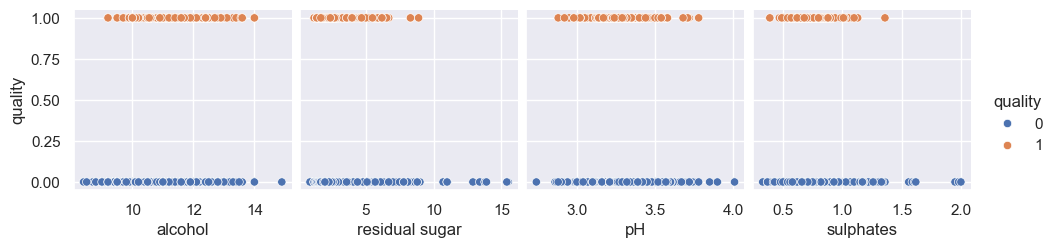

In [10]:
# check the relationship between the data
sns.set_theme() 
sns.pairplot(red_wine_df, x_vars=['alcohol', 'residual sugar', 'pH', 'sulphates'], y_vars=['quality'], hue='quality')

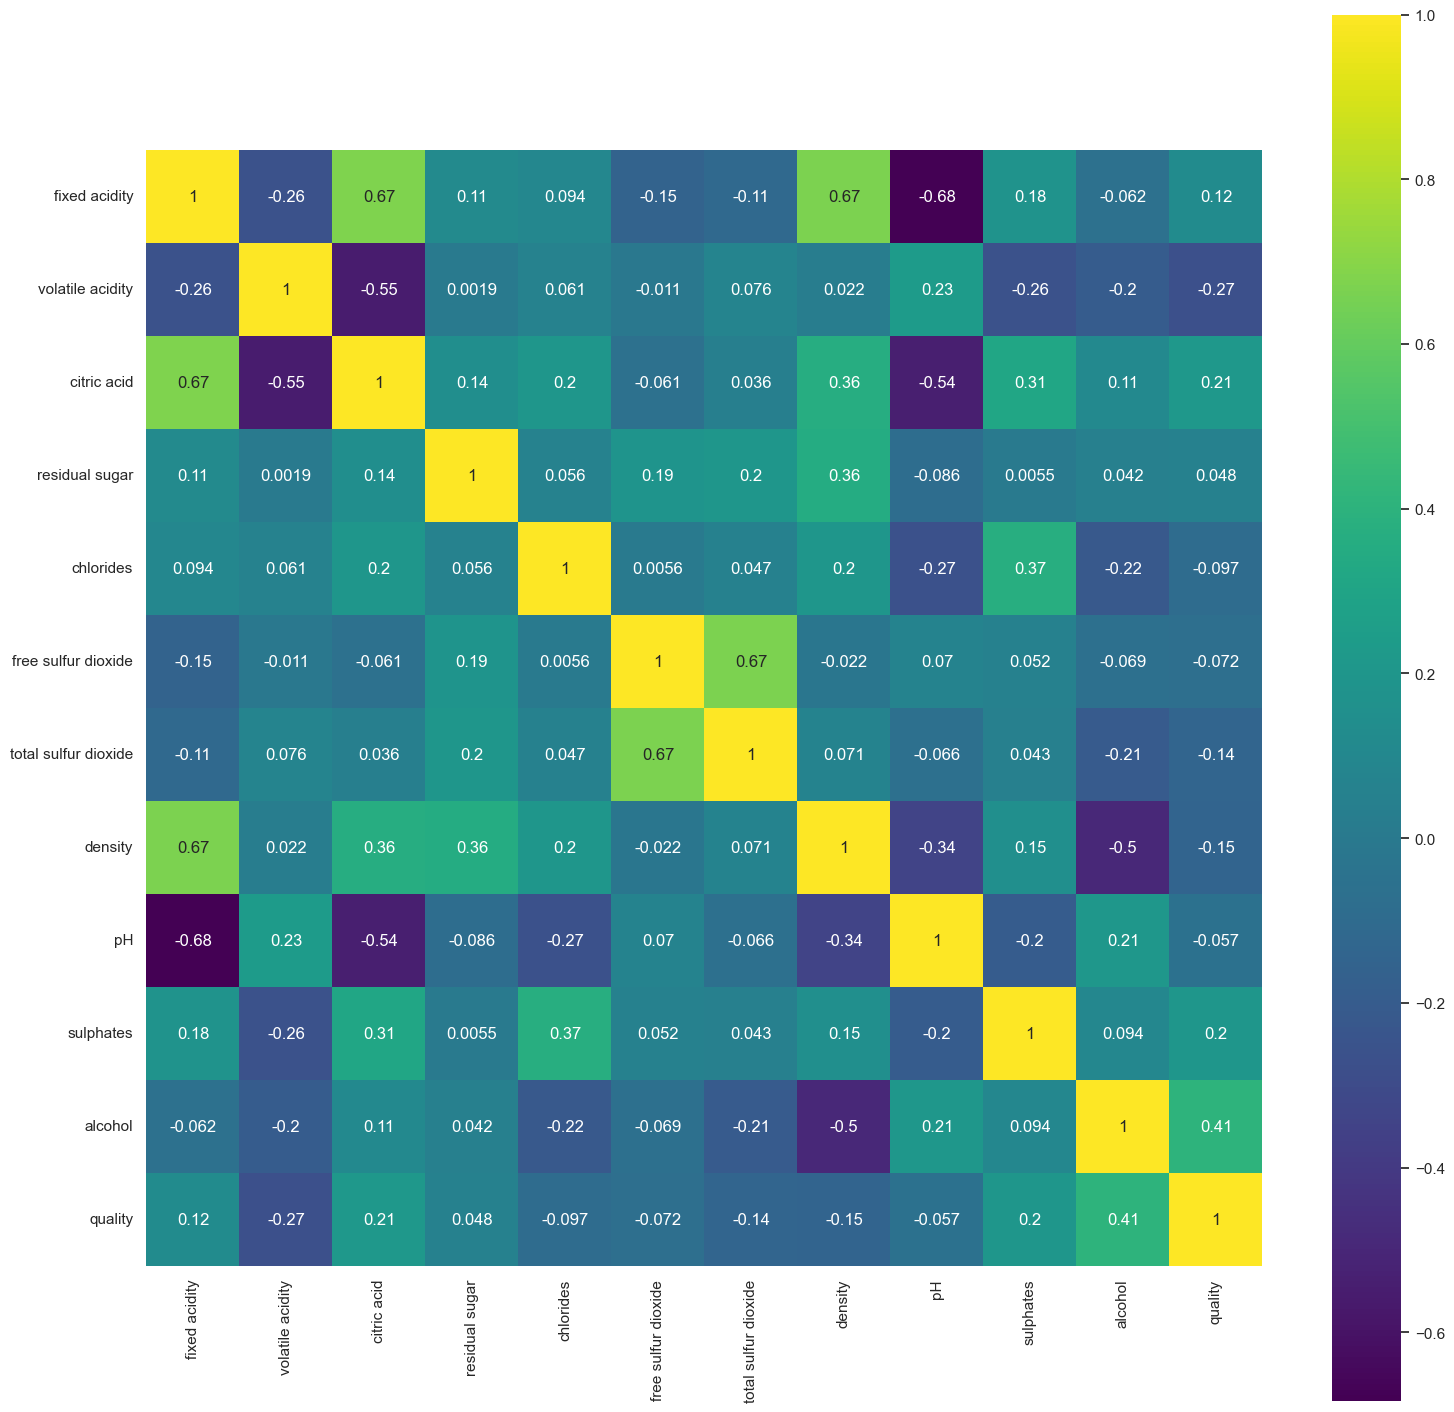

In [11]:
# check the heatmap 
plt.subplots(figsize=(18,18))
#cmap = sns.diverging_palette(275, 150, s=40, l=55, n=9)
sns.heatmap(red_wine_df.corr(), cmap='viridis', annot=True, square=True);

In [12]:
# Separate the dependent and independent variables 
X = red_wine_df.drop(columns=['quality'], axis=1)
y = red_wine_df['quality']

In [13]:
# split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [14]:
# No categorical values in the dataset so we can apply just scaling to Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# column names are gone during scaling if you notice below
pd.DataFrame(X_test_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.419987,-0.328817,0.807128,-0.312102,1.757465,1.042820,0.562563,0.766609,-0.908519,0.577436,0.363849
1,-0.136873,1.589282,-1.392011,1.065326,0.166919,-1.049065,-0.986389,0.947295,0.325988,-0.738525,-0.767274
2,0.439742,-1.315268,0.295700,-0.346538,-0.502785,-0.288380,-0.599151,-0.848937,-0.323753,1.035161,1.212191
3,1.074018,0.630232,0.449129,-0.518717,-0.712067,-1.049065,-0.986389,0.766609,-0.908519,-1.367898,-0.390233
4,2.227248,-0.438423,1.113985,-0.794202,-0.251646,-1.239236,-1.224690,0.075751,-1.168416,-0.166368,-0.013192


In [16]:
# Note : The column names in the train/test scaled data so lets copy it back
col_names = list(X_train.columns)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)
pd.DataFrame(X_train_scaled).head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.901034,0.054803,0.909414,-0.174359,-0.335359,-0.003122,-0.211913,1.244895,0.520910,-0.223584,-0.955794
1,1.419987,-1.479676,0.909414,0.514355,-0.565570,0.377220,0.056175,0.235179,-1.168416,-0.681310,-0.767274
2,0.901034,-0.986451,1.420842,-0.312102,-0.523713,-1.049065,-0.986389,0.182036,-0.323753,0.749083,0.175328
3,-1.578410,1.753690,-1.136297,-0.794202,-0.879493,-0.383465,1.217889,-2.315682,1.625469,0.920730,2.343314
4,-1.001795,1.068655,-0.931726,2.029526,0.627340,-0.668722,-0.897027,-0.110250,0.261014,-0.967388,0.363849


In [17]:
# check the distribution after scaling
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1279.0,-3.583269e-16,1.000391,-2.097363,-0.713488,-0.252196,0.555065,4.360723
volatile acidity,1279.0,4.555473e-16,1.000391,-2.246915,-0.767239,-0.054803,0.589130,5.754296
citric acid,1279.0,-9.166501e-17,1.000391,-1.392011,-0.931726,-0.062299,0.755985,3.722267
residual sugar,1279.0,-1.666637e-17,1.000391,-1.138559,-0.449845,-0.243231,0.032255,8.916670
chlorides,1279.0,1.722191e-16,1.000391,-1.570125,-0.356287,-0.167933,0.062277,10.965890
free sulfur dioxide,1279.0,-8.888729e-17,1.000391,-1.429408,-0.763808,-0.193294,0.472306,5.321677
total sulfur dioxide,1279.0,-6.666546e-17,1.000391,-1.224690,-0.748089,-0.271488,0.473200,7.205186
density,1279.0,-6.292456e-14,1.000391,-3.553912,-0.604479,0.001350,0.583266,3.684156
pH,1279.0,3.405494e-15,1.000391,-3.702404,-0.648623,0.001118,0.585884,4.549302
sulphates,1279.0,-2.777728e-16,1.000391,-1.653976,-0.624094,-0.223584,0.405789,7.672182


<Axes: xlabel='alcohol', ylabel='Count'>

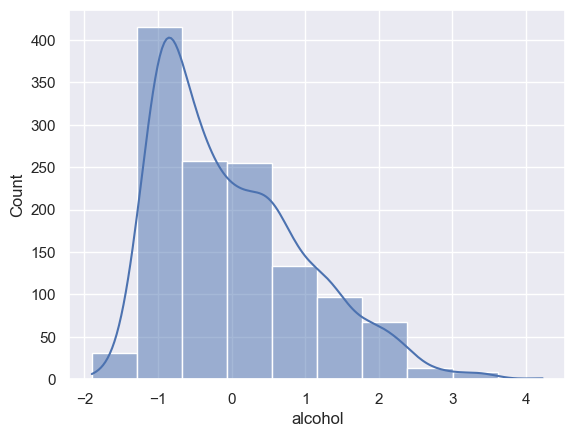

In [18]:
# lets plot one of the feature to check the distribution 
sns.histplot(X_train_scaled['alcohol'], bins=10, kde=True)

In [19]:
# need to find out the various labels in y
unique_classes = np.unique(red_wine_df['quality'])
print(unique_classes)
print(len(unique_classes))

[0 1]
2


In [20]:
# Label Encoding - This is required when the output labels is not binary 
#y_train = to_categorical(y_train, num_classes = 9)
#y_test = to_categorical(y_test, num_classes = 9)
#print(f'The shape of y_train after OHE = {y_train.shape}')
#print(f'The shape of y_test after OHE = {y_test.shape}')



In [21]:
# Build the ANN model 
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 128, activation = 'relu', input_dim = 11))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
#model.add(Dense(units = 9, activation = 'sigmoid')) # required if the output is not binary
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # required if the output is not binary
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 5, epochs = 10, callbacks=[early_stopping], validation_data = (X_test, y_test))

Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.7596 - loss: 0.6576 - val_accuracy: 0.9062 - val_loss: 0.3041
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.8568 - loss: 0.4213 - val_accuracy: 0.9062 - val_loss: 0.2859
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.8561 - loss: 0.4370 - val_accuracy: 0.9062 - val_loss: 0.2937
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.8571 - loss: 0.4088 - val_accuracy: 0.9062 - val_loss: 0.2968
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8640 - loss: 0.3822 - val_accuracy: 0.9062 - val_loss: 0.2898
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.8510 - loss: 0.3867 - val_accuracy: 0.9062 - val_loss: 0.2726
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8431 - loss: 0.4104 - val_accuracy: 0.9094 - val_loss: 0.3305
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8580 - loss: 0.3736 - 

In [22]:
y_predict = model.predict(X_test)
print(y_predict)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
[[0.03659699]
 [0.03081065]
 [0.3510212 ]
 [0.05750592]
 [0.16402163]
 [0.00693916]
 [0.03307242]
 [0.31642997]
 [0.01183107]
 [0.00466035]
 [0.05388153]
 [0.02362536]
 [0.15046164]
 [0.00563645]
 [0.1168596 ]
 [0.25041434]
 [0.5403825 ]
 [0.1472576 ]
 [0.10441187]
 [0.02291539]
 [0.20890118]
 [0.04216473]
 [0.04912709]
 [0.03271447]
 [0.050627  ]
 [0.00178595]
 [0.00431067]
 [0.3512568 ]
 [0.00312512]
 [0.0655067 ]
 [0.19537225]
 [0.05467349]
 [0.1814507 ]
 [0.01669554]
 [0.12224703]
 [0.2183814 ]
 [0.00957087]
 [0.02873597]
 [0.23392023]
 [0.12204174]
 [0.0882367 ]
 [0.3266882 ]
 [0.10248727]
 [0.42421585]
 [0.12677877]
 [0.0069471 ]
 [0.08755237]
 [0.03774491]
 [0.0286246 ]
 [0.07248204]
 [0.0497602 ]
 [0.02386857]
 [0.28177083]
 [0.0365674 ]
 [0.10064886]
 [0.00292007]
 [0.00268615]
 [0.01792638]
 [0.3258029 ]
 [0.05862835]
 [0.01488036]
 [0.09409007]
 [0.324636  ]
 [0.14504777]
 [0.01187918]
 [0.18004751]
 [0.08867803]
 [0.14034136]
 [0.421

In [23]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.828772,0.486729,0.906250,0.304129
1,0.852228,0.428117,0.906250,0.285931
2,0.853792,0.416322,0.906250,0.293699
3,0.853792,0.413169,0.906250,0.296793
4,0.853792,0.406151,0.906250,0.289815
5,0.852228,0.394981,0.906250,0.272552
6,0.853010,0.392872,0.909375,0.330526
7,0.856138,0.375541,0.906250,0.299690
8,0.858483,0.360579,0.893750,0.279279
9,0.857701,0.340424,0.912500,0.231311


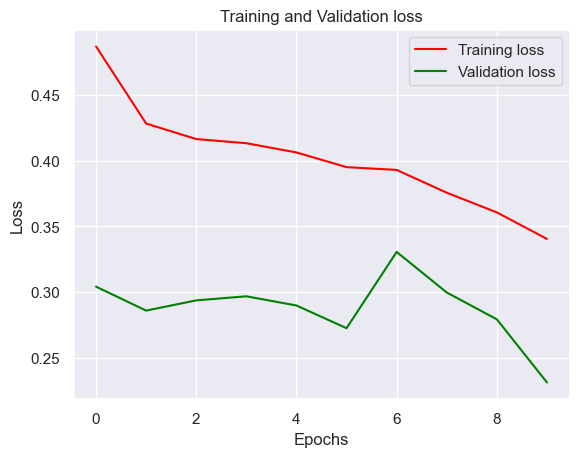

In [24]:
# Plotting training and validation loss over epochs
plt.plot(history_df.loc[:, ['loss']], "red", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"green", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

This plot shows the training and validation accuracy of an Artificial Neural Network (ANN) model over 40 epochs. Here's what can be observed:
1. Fluctuating Validation Accuracy:

    The validation accuracy shows significant fluctuations throughout the epochs. This is a common sign that the model might be overfitting or is struggling to generalize well to unseen data.
    The fluctuation can indicate that the model is not able to consistently perform well on the validation set, even though it improves slightly over time.

2. Training Accuracy Increasing Steadily:

    The training accuracy starts from a lower value and increases somewhat steadily as training progresses. This indicates that the model is learning from the training data.
    The training accuracy curve is smoother compared to the validation accuracy curve, which is typical because the model sees the same training data repeatedly and can learn it better over time.

3. Validation Accuracy Greater than Training Accuracy:

    At many points, the validation accuracy is higher than the training accuracy. This can sometimes indicate that the model is regularizing well or that the training set might have noise or is less representative than the validation set. However, in combination with the high fluctuation, it may also suggest a potential instability in the learning process.

4. Underfitting:

    Both the training and validation accuracies seem relatively low (below 0.625), even after 40 epochs. This suggests that the model may be underfitting, meaning it's not complex enough or the training might need more epochs to reach higher accuracy.

Suggestions to Improve the Model:

    More Epochs: Continue training the model for more epochs and see if training accuracy improves further.
    Reduce Overfitting: Use techniques such as dropout, early stopping (though it seems early stopping might be in use), or data augmentation to reduce overfitting.
    Tuning Hyperparameters: Consider adjusting hyperparameters such as learning rate, batch size, or network architecture (e.g., increasing the number of layers or neurons).
    Check Data Balance: Ensure that the training and validation datasets are balanced, and that the model is not overfitting to certain classes.

In summary, this accuracy plot indicates that the model has room for improvement, and further tuning and validation of the model’s architecture or data preprocessing steps could help improve its performance.

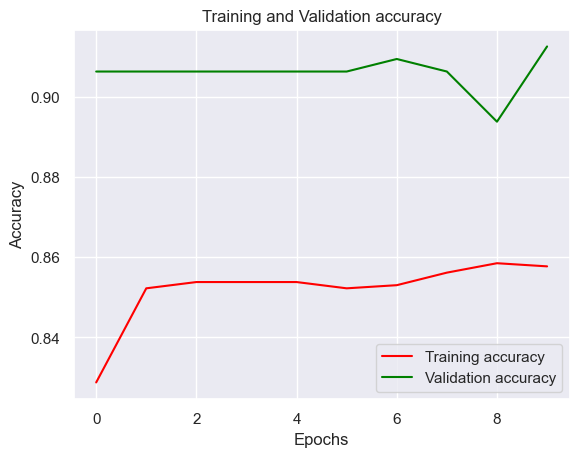

In [25]:
# Plotting training and validation accuracy over epochs
plt.plot(history_df.loc[:, ['accuracy']], "red", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "green", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
# Change it to 1-D for using it in Confusion Matrix
#Y_test_1D = np.argmax(y_test, axis=1)
#print(Y_test_1D)

#Y_predict_1D = np.argmax(y_predict, axis=1)
#print(Y_predict_1D)

##result = confusion_matrix(Y_test_1D, Y_predict_1D)
#print(result)

In [27]:
#y_test, y_predict

In [28]:
#cmap = sns.diverging_palette(275, 150, s=40, l=55, n=9)
#sns.heatmap(result, annot=True, cmap='viridis', square=True, fmt=".1f")

NameError: name 'result' is not defined